In [31]:
%load_ext autoreload
%autoreload 2

import numpy as np
from phasicdoorkey import PhasicDoorKeyEnv
from earplugenv import EarplugEnv

import matplotlib.pyplot as plt

from scripts.train import train
from scripts.visualize import visualize
from utils.format import train_arg_parser, visualize_arg_parser
from utils.storage import generate_gif
from utils.env import plot_env


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
version = "v0_11"

In [47]:
env_p1 = EarplugEnv(phase=1, size=7, max_steps=100, render_mode="rgb_array")
env_p2 = EarplugEnv(phase=2, size=7, max_steps=100, render_mode="rgb_array")
env_p3 = EarplugEnv(phase=3, size=7, max_steps=100, render_mode="rgb_array")


In [43]:
env = EarplugEnv(3, size=5)#, render_mode="rgb_array")
env.reset()
env.step(1)



({'image': array([[[0, 0, 0],
          [0, 0, 0],
          [0, 0, 0],
          [0, 0, 0],
          [0, 0, 0],
          [0, 0, 0],
          [0, 0, 0]],
  
         [[0, 0, 0],
          [0, 0, 0],
          [0, 0, 0],
          [0, 0, 0],
          [2, 5, 0],
          [2, 5, 0],
          [2, 5, 0]],
  
         [[0, 0, 0],
          [0, 0, 0],
          [0, 0, 0],
          [0, 0, 0],
          [2, 5, 0],
          [1, 0, 0],
          [1, 0, 0]],
  
         [[0, 0, 0],
          [0, 0, 0],
          [0, 0, 0],
          [0, 0, 0],
          [2, 5, 0],
          [1, 0, 0],
          [1, 0, 0]],
  
         [[0, 0, 0],
          [0, 0, 0],
          [0, 0, 0],
          [0, 0, 0],
          [2, 5, 0],
          [8, 1, 0],
          [1, 0, 0]],
  
         [[0, 0, 0],
          [0, 0, 0],
          [0, 0, 0],
          [0, 0, 0],
          [2, 5, 0],
          [2, 5, 0],
          [2, 5, 0]],
  
         [[0, 0, 0],
          [0, 0, 0],
          [0, 0, 0],
          [0, 0, 0],
 

In [32]:
version = "tmp"


In [33]:
envs = [EarplugEnv(i, render_mode="rgb_array") for i in range(1, 4)]

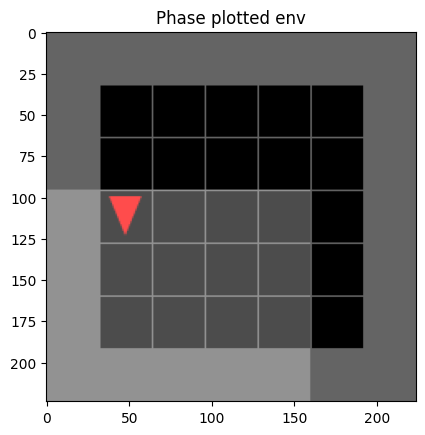

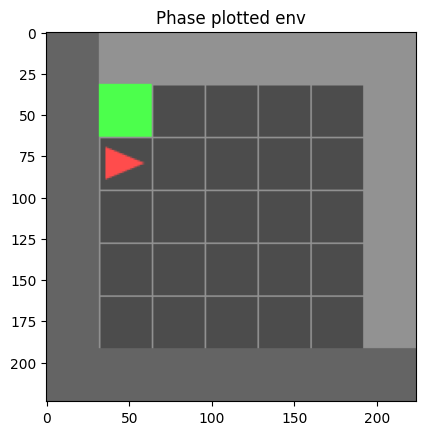

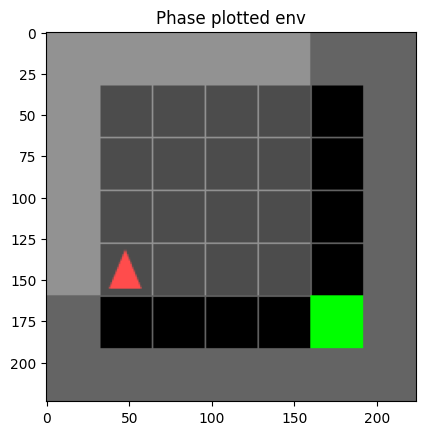

[None, None, None]

In [34]:
[plot_env(env) for env in envs]

In [35]:
env = EarplugEnv(3, render_mode="rgb_array")

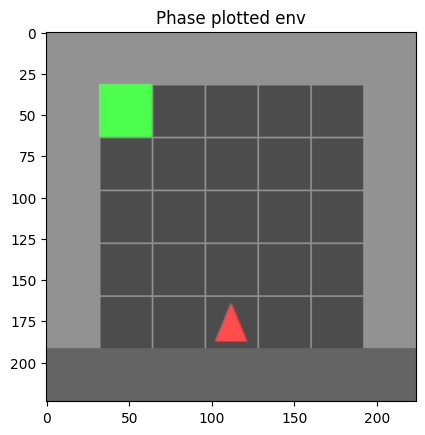

In [36]:
env.reset()
horse = env.step(1)
plot_env(env)

In [39]:
print(env.grid.get(1, 1))

In [38]:
print(env.grid.get(*env.agent_pos))

None


In [ ]:
generate_gif(env, phase=3, version=version, gif_version=i+3)

In [2]:
env.phase

NameError: name 'env' is not defined

In [29]:
env.grid.__dict_

{'width': 7,
 'height': 7,
 'grid': [<minigrid.core.world_object.Wall at 0x7faa4941ea40>,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  <minigrid.core.world_object.Wall at 0x7fa98e681840>]}

In [98]:
env.__dict__

{'size': 7,
 'phase': 3,
 'alarm_sounding': False,
 'mission': 'get to the goal',
 'actions': <enum 'Actions'>,
 'action_space': Discrete(7),
 'agent_view_size': 7,
 'observation_space': Dict('direction': Discrete(4), 'image': Box(0, 255, (7, 7, 3), uint8), 'mission': MissionSpace(<function EarplugEnv._gen_mission at 0x7fce1ccc09d0>, None)),
 'reward_range': (0, 1),
 'window': None,
 'width': 7,
 'height': 7,
 'max_steps': 490,
 'see_through_walls': False,
 'agent_pos': (3, 2),
 'agent_dir': 0,
 'grid': <minigrid.core.grid.Grid at 0x7fce1cc2d120>,
 'carrying': None,
 'render_mode': 'rgb_array',
 'highlight': True,
 'tile_size': 32,
 'agent_pov': False,
 '_np_random': Generator(PCG64) at 0x7FCE1CF87E60,
 'step_count': 1}

In [99]:
env.alarm_sounding

False

In [8]:
from minigrid.core.world_object import Door, Goal, Key


In [3]:
env_p1 = PhasicDoorKeyEnv(phase=1, size=7, render_mode="rgb_array")
env_p2 = PhasicDoorKeyEnv(phase=2, size=7, render_mode="rgb_array")
env_p3 = PhasicDoorKeyEnv(phase=3, size=7, render_mode="rgb_array")

show_envs = [env_p1, env_p2, env_p3]

In [14]:
env = PhasicDoorKeyEnv(phase=3, size=7, render_mode="rgb_array")
# env.reset()

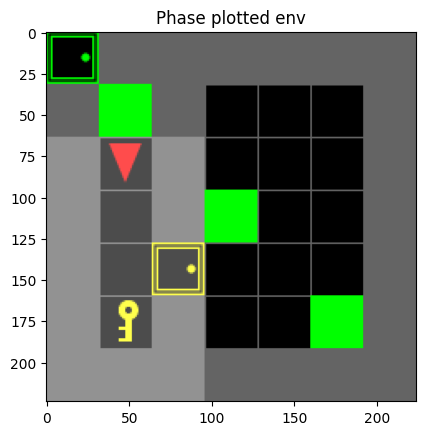

In [24]:
env.put_obj(Goal(), 1, 1)
env.put_obj(Goal(), 3, 3)
env.put_obj(Door('green'), 0, 0)

plot_env(env)

In [27]:
a = np.array([env._rand_int(0, 7) for _ in range(100000)])
np.unique(a)

array([0, 1, 2, 3, 4, 5, 6])

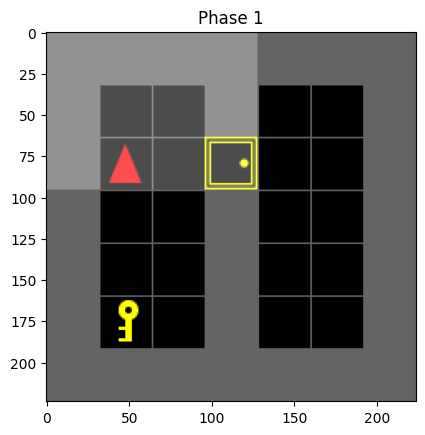

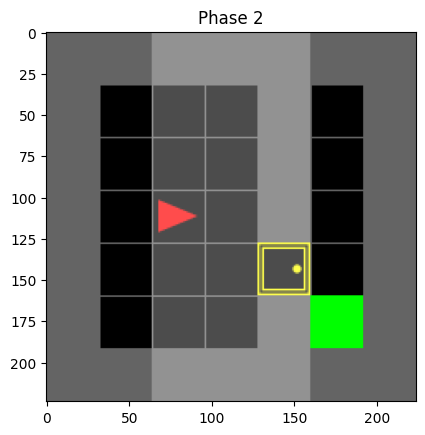

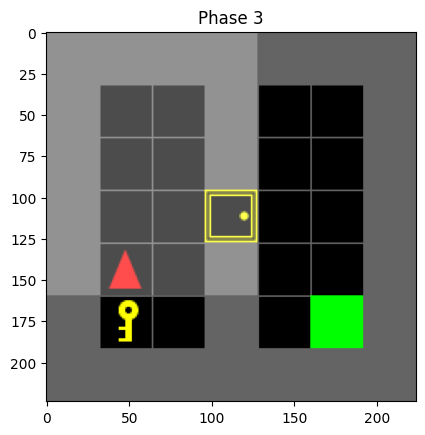

In [4]:
for i, env in enumerate(show_envs):
    plot_env(env, str(i+1))

In [12]:
env_p3.door_pos

(2, 3)

In [15]:
obs, reward, terminated, truncated, info = env_p3.step(1)

In [18]:
a = obs['image']

In [20]:
a[5, 5]

array([2, 5, 0], dtype=uint8)

In [9]:
envs = []
for i in range(3):
    environments = [PhasicDoorKeyEnv(phase=i+1, size=7) for _ in range(100)]
    envs.append(environments)

## Phase 1

In [11]:
train_args = train_arg_parser("ppo", envs[0], model=f"model_{version}", frames=1e5)

train(train_args)

Device: cuda

Training status loaded

Observations preprocessor loaded
Model loaded

Optimizer loaded



Process Process-103:
Process Process-106:
Process Process-104:
Process Process-102:
Process Process-101:
Process Process-107:
Traceback (most recent call last):
Process Process-108:
Process Process-100:
Process Process-105:
  File "/root/miniconda3/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Process Process-117:
Process Process-148:
Process Process-123:
Process Process-138:
Traceback (most recent call last):
Process Process-113:
Process Process-116:
Process Process-110:
Process Process-158:
Process Process-111:
Process Process-118:
Process Process-140:
Process Process-129:
Process Process-135:
Process Process-156:
Process Process-128:
Process Process-159:
Process Process-144:
Process Process-112:
Process Process-141:
  File "/root/miniconda3

TypeError: PhasicDoorKeyEnv.step() missing 1 required positional argument: 'agent'

  File "/home/mailv/documents/SPAR_internship/rl_shutdown_venv/lib/python3.10/site-packages/torch_ac/utils/penv.py", line 11, in worker
    obs, reward, terminated, truncated, info = env.step(data)
  File "/root/miniconda3/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/root/miniconda3/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/home/mailv/documents/SPAR_internship/rl_shutdown_venv/lib/python3.10/site-packages/torch_ac/utils/penv.py", line 11, in worker
    obs, reward, terminated, truncated, info = env.step(data)
  File "/root/miniconda3/lib/python3.10/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
TypeError: PhasicDoorKeyEnv.step() missing 1 required positional argument: 'agent'
TypeError: PhasicDoorKeyEnv.step() missing 1 required positional argument: 'agent'
  File "/root/miniconda3/lib/python3.10/multiprocessing/process.py", line 108, in run
    

  File "/home/mailv/documents/SPAR_internship/rl_shutdown_venv/lib/python3.10/site-packages/torch_ac/utils/penv.py", line 11, in worker
    obs, reward, terminated, truncated, info = env.step(data)
TypeError: PhasicDoorKeyEnv.step() missing 1 required positional argument: 'agent'
TypeError: PhasicDoorKeyEnv.step() missing 1 required positional argument: 'agent'
TypeError: PhasicDoorKeyEnv.step() missing 1 required positional argument: 'agent'
  File "/root/miniconda3/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
TypeError: PhasicDoorKeyEnv.step() missing 1 required positional argument: 'agent'
  File "/root/miniconda3/lib/python3.10/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/root/miniconda3/lib/python3.10/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/root/miniconda3/lib/python3.10/multiprocessing/process.py", line 108, in run
    self._ta

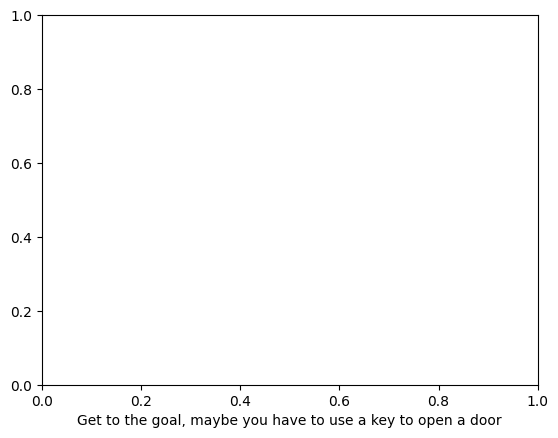

Device: cuda



FileNotFoundError: [Errno 2] No such file or directory: 'storage/model_v0.6/status.pt'

In [79]:
# %%capture  
# # use capture to avoid generating unneeded output
generate_gif(env_p1, phase=1, version=version)

## Phase 2

In [ ]:
train_args = train_arg_parser("ppo", envs[1], model=f"model_{version}", frames=1e6)

train(train_args)

## Phase 3
The agent is not trained anymore in phase 3.

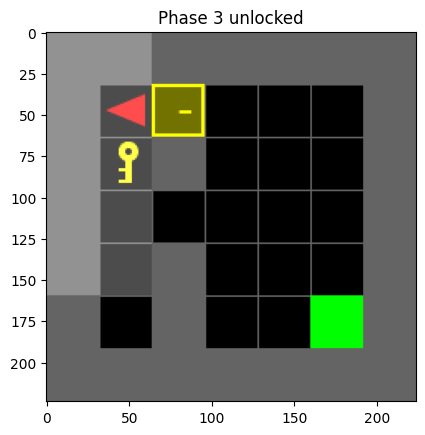

In [18]:
env = PhasicDoorKeyEnv(phase=3, door_locked=True, size=7, max_steps=500, render_mode="rgb_array")
env.reset()
img = env.render()

# Plot the rendered image
plt.imshow(img)
plt.title(name)
plt.show()

In [19]:
%%capture  
# use capture to avoid generating unneeded output

# env = PhasicDoorKeyEnv(phase=1, door_locked=True, size=7, max_steps=100, render_mode="human")
# env.reset()

env_p3_u.render_mode = "human"
env_p3_u.door_locked=True

env.render_mode = "human"
env.reset()
visualize_args = visualize_arg_parser(env, f"model_{version}", gif=f"gifs/gif_{version}", episodes=1)

visualize(visualize_args)

In [1]:
import pandas as pd

In [8]:
df = pd.read_csv("storage/model_v0.8/log.csv")
print(df.shape)

df.head()

(88, 21)


,update,frames,FPS,duration,rreturn_mean,rreturn_std,rreturn_min,rreturn_max,num_frames_mean,num_frames_std,...,num_frames_max,entropy,value,policy_loss,value_loss,grad_norm,return_mean,return_std,return_min,return_max
0,1,12800,1584.6634286500946,8,0.0,0.0,0,0,0.0,0.0,...,0,1.8830414342880248,-0.37331805765628817,0.7777708327770233,0.487721198797226,0.22888405534755696,0.0,0.0,0,0
1,update,frames,FPS,duration,rreturn_mean,rreturn_std,rreturn_min,rreturn_max,num_frames_mean,num_frames_std,...,num_frames_max,entropy,value,policy_loss,value_loss,grad_norm,return_mean,return_std,return_min,return_max
2,2,25600,1756.8630079176671,15,-0.06967341899871826,0.6932417660399036,-6.967341899871826,0.0,2.0,19.8997487421324,...,200.0,1.8200863075256348,-0.5969047343730927,0.6548928129673004,0.3458957552909851,0.21303732316873977,-0.06967341899871826,0.6932417660399036,-6.967341899871826,0.0
3,update,frames,FPS,duration,rreturn_mean,rreturn_std,rreturn_min,rreturn_max,num_frames_mean,num_frames_std,...,num_frames_max,entropy,value,policy_loss,value_loss,grad_norm,return_mean,return_std,return_min,return_max
4,3,38400,1854.4335262166135,22,-0.2566734790802002,1.5229114027789263,-12.10000991821289,0.0,6.04,36.38816291048505,...,287.0,1.6790263080596923,-0.7954192626476287,0.5103526544570923,0.20480986088514327,0.21295362689359618,-0.2566734790802002,1.5229114027789263,-12.10000991821289,0.0


In [25]:
dir(env_p3)

['Actions',
 '__annotations__',
 '__class__',
 '__class_getitem__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__orig_bases__',
 '__parameters__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_gen_grid',
 '_gen_mission',
 '_is_protocol',
 '_np_random',
 '_rand_bool',
 '_rand_color',
 '_rand_elem',
 '_rand_float',
 '_rand_int',
 '_rand_pos',
 '_rand_subset',
 '_reward',
 'action_space',
 'actions',
 'agent_dir',
 'agent_pos',
 'agent_pov',
 'agent_sees',
 'agent_view_size',
 'carrying',
 'close',
 'dir_vec',
 'front_pos',
 'gen_obs',
 'gen_obs_grid',
 'get_frame',
 'get_full_render',
 'get_pov_render',
 'get_view_coords',
 'get_view_exts',
 'grid',
 'hash',
 'height',
 'highlight

In [27]:
env_p3.carrying